In [45]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
features = pd.read_csv('temps.csv')
features

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47
344,2016,12,28,Wed,42,47,45.3,48,58
345,2016,12,29,Thurs,47,48,45.3,48,65
346,2016,12,30,Fri,48,48,45.4,57,42


In [49]:
print(features)

     year  month  day   week  temp_2  temp_1  average  actual  friend
0    2016      1    1    Fri      45      45     45.6      45      29
1    2016      1    2    Sat      44      45     45.7      44      61
2    2016      1    3    Sun      45      44     45.8      41      56
3    2016      1    4    Mon      44      41     45.9      40      53
4    2016      1    5   Tues      41      40     46.0      44      41
..    ...    ...  ...    ...     ...     ...      ...     ...     ...
343  2016     12   27   Tues      42      42     45.2      47      47
344  2016     12   28    Wed      42      47     45.3      48      58
345  2016     12   29  Thurs      47      48     45.3      48      65
346  2016     12   30    Fri      48      48     45.4      57      42
347  2016     12   31    Sat      48      57     45.5      40      57

[348 rows x 9 columns]


In [50]:
print(features)

     year  month  day   week  temp_2  temp_1  average  actual  friend
0    2016      1    1    Fri      45      45     45.6      45      29
1    2016      1    2    Sat      44      45     45.7      44      61
2    2016      1    3    Sun      45      44     45.8      41      56
3    2016      1    4    Mon      44      41     45.9      40      53
4    2016      1    5   Tues      41      40     46.0      44      41
..    ...    ...  ...    ...     ...     ...      ...     ...     ...
343  2016     12   27   Tues      42      42     45.2      47      47
344  2016     12   28    Wed      42      47     45.3      48      58
345  2016     12   29  Thurs      47      48     45.3      48      65
346  2016     12   30    Fri      48      48     45.4      57      42
347  2016     12   31    Sat      48      57     45.5      40      57

[348 rows x 9 columns]


## 处理时间数据

In [51]:
import datetime
years = features['year']
month = features['month']
days = features['day']
# 转换为datetime格式
dates = [str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year,month,day in zip(years,month,days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]


In [52]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

Text(0.5, 1.0, 'friend_predict Temp')

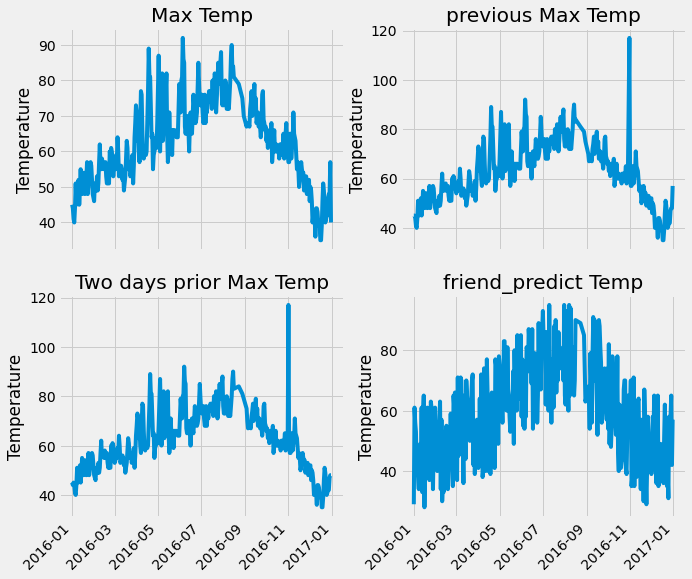

In [53]:
# 进行可视化分析
plt.style.use('fivethirtyeight')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation = 45)
# 实际值
ax1.plot(dates,features['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature')
ax1.set_title('Max Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature')
ax2.set_title('previous Max Temp')
# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('')
ax3.set_ylabel('Temperature')
ax3.set_title('Two days prior Max Temp')
# 朋友预测
ax4.plot(dates, features['friend'])
ax4.set_xlabel('')
ax4.set_ylabel('Temperature')
ax4.set_title('friend_predict Temp')


In [54]:
# 将数据进行独立编码
features = pd.get_dummies(features)
features

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,42,1,0,0,0,0,0,0


In [55]:
# 设置标签值
labels = np.array(features['actual'])
# 设值特征值（去除标签就是特征）
features = features.drop('actual', axis=1)
# 保存列名
features_list = list(features.columns)


In [56]:
# 将特征值转换为numpy格式
features = np.array(features)
print(features.shape)
print(features)


(348, 14)
[[2.016e+03 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.016e+03 1.200e+01 2.900e+01 ... 1.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.200e+01 3.000e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.200e+01 3.100e+01 ... 0.000e+00 0.000e+00 0.000e+00]]


In [57]:
# 将数据进行标准化，即将各个数据值进行等比例扩大或者缩小
from sklearn import preprocessing
input_featurs = preprocessing.StandardScaler().fit_transform(features)
print(input_featurs)

[[ 0.         -1.5678393  -1.65682171 ... -0.40482045 -0.41913682
  -0.40482045]
 [ 0.         -1.5678393  -1.54267126 ... -0.40482045 -0.41913682
  -0.40482045]
 [ 0.         -1.5678393  -1.4285208  ... -0.40482045 -0.41913682
  -0.40482045]
 ...
 [ 0.          1.5810006   1.53939107 ...  2.47023092 -0.41913682
  -0.40482045]
 [ 0.          1.5810006   1.65354153 ... -0.40482045 -0.41913682
  -0.40482045]
 [ 0.          1.5810006   1.76769198 ... -0.40482045 -0.41913682
  -0.40482045]]


In [58]:
print(input_featurs.shape[1])

14


## 构建神经网络模型


In [72]:
import torch
input_size = input_featurs.shape[1] # 定义样本数量，即16个特征值
hidden_size = 128 #隐层神经元的个数
output_size =1
batch_size = 8 #分批处理
my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size,hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size,output_size)
)
cost = torch.nn.MSELoss(reduction='mean')
optimize = torch.optim.Adam(my_nn.parameters(),lr = 0.001)
# 训练网络
losses = []
for i in range(1000):
    batch_loss=[]
    # MINI_Batch方法来进行训练
    for start in range(0,len(input_featurs),batch_size):
        end = start+batch_size if start +batch_size < len(input_featurs) else len(input_featurs)
        xx = torch.tensor(input_featurs[start:end],dtype=torch.float,requires_grad=True)
        yy =torch.tensor(labels[start:end],dtype=torch.float,requires_grad=True)
        predication = my_nn(xx)
        loss = cost(predication,yy)
        optimize.zero_grad()
        loss.backward()
        optimize.step()
        batch_loss.append(loss.data.numpy())

        # 打印损失
    if i % 100 ==0:
        losses.append(np.mean(batch_loss))
        print(i,np.mean(batch_loss))



/env/pytorch_project/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/env/pytorch_project/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 3883.3188
100 31.31551
200 30.933718
300 30.669645
400 30.46137
500 30.273592
600 30.074255
700 29.856432
800 29.628027
900 29.403387


## 训练预测结果

In [87]:
x = torch.tensor(input_featurs,dtype=torch.float)
predict = my_nn(x).data.numpy() #转换成array数组，便于画图
print(predict)

[[45.480194]
 [46.32092 ]
 [46.307114]
 [46.048126]
 [46.383545]
 [45.858925]
 [46.851013]
 [46.78382 ]
 [48.783005]
 [49.454887]
 [50.979458]
 [48.736088]
 [48.91236 ]
 [51.377693]
 [49.59575 ]
 [51.064655]
 [52.057415]
 [52.161835]
 [52.661766]
 [50.982628]
 [50.838646]
 [50.563957]
 [53.16207 ]
 [51.837006]
 [52.828808]
 [52.993656]
 [53.614525]
 [52.770973]
 [54.04382 ]
 [52.348553]
 [51.99595 ]
 [49.155853]
 [49.927853]
 [51.145844]
 [50.47315 ]
 [49.395638]
 [51.720013]
 [50.63286 ]
 [52.02524 ]
 [55.0141  ]
 [57.32697 ]
 [56.439255]
 [54.5444  ]
 [55.156754]
 [55.70969 ]
 [55.639313]
 [54.355453]
 [54.212566]
 [53.593704]
 [54.19026 ]
 [54.312065]
 [54.82191 ]
 [55.783936]
 [56.307182]
 [57.60809 ]
 [57.68429 ]
 [57.33567 ]
 [56.053467]
 [56.900368]
 [56.613068]
 [57.568283]
 [57.58844 ]
 [59.144268]
 [57.515366]
 [56.288734]
 [56.67572 ]
 [55.853264]
 [56.95507 ]
 [55.887207]
 [54.757927]
 [55.475105]
 [54.077637]
 [54.64354 ]
 [55.992813]
 [57.70613 ]
 [59.37996 ]
 [61.748596]

## 对预测值进行操作

In [97]:
# 转换日期格式
dates = [str(int(year))+'-'+str(int(month))+'-'+str(int(day))
         for year, month, day in zip(years, month, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]


# 创建一个表格来存储日期和其对应的真实值
true_data = pd.DataFrame(data={'date':dates,'actual':labels})

# 创建一个表格来存储日期和其对应的模型预测值
predications_data = pd.DataFrame(data={'date':dates,'prediction':predict.reshape(-1)})
# print(predications_data)


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9

Text(0.5, 1.0, 'Actual and Prediced Values')

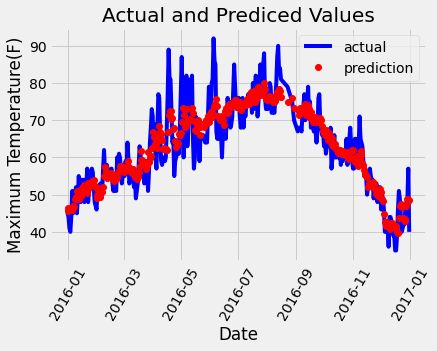

In [75]:
# 真实值
plt.plot(true_data['date'],true_data['actual'],'b-',label='actual')
# 预测值
plt.plot(predications_data['date'],predications_data['prediction'],'ro',label='prediction')
plt.xticks(rotation='60')
plt.legend()
plt.xlabel('Date');plt.ylabel('Maximum Temperature(F)')
# 标题
plt.title('Actual and Prediced Values')